<center> <h1> Object Size Experiments </h1> </center>

In [27]:
#import all packages needed
import json
import pandas as pd
import matplotlib.pyplot as plt

# Centralize the graphs and tables.
from IPython.core.display import HTML, display


display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

<center> <h3> Sequential Write Bandwidth vs. Object Sizes </h3> </center>

,object size,bandwidth[MB/s]
0,0.25MB,39.426
1,0.5MB,32.034
2,1MB,36.353
3,2MB,37.951
4,4MB,38.569
5,8MB,34.374
6,16MB,37.418
7,32MB,35.766
8,64MB,37.729


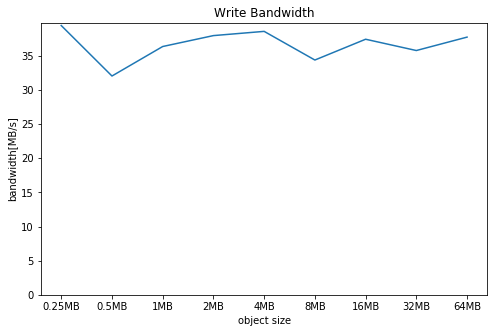

In [41]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

w_bw_list = []
for i in range(len(object_sizes)):
    with open('./data/W'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    w_bw_list.append([object_sizes[i],data['jobs'][0]['write']['bw']/1000])

w_bw_df = pd.DataFrame(w_bw_list, columns=['object size','bandwidth[MB/s]'])
display(w_bw_df)

fig = w_bw_df.plot(x='object size', y='bandwidth[MB/s]', title='Write Bandwidth' ,legend=False, xticks=w_bw_df.index , figsize=[8,5])
fig.set_ylabel("bandwidth[MB/s]")
fig.set_ylim(ymin=0)
plt.show()


<center> <h3> Sequential Read Bandwidth vs. Object Sizes </h3> </center>

,object size,bandwidth[MB/s]
0,0.25MB,83.359
1,0.5MB,64.244
2,1MB,67.846
3,2MB,76.690
4,4MB,82.498
5,8MB,86.690
6,16MB,84.745
7,32MB,86.938
8,64MB,88.169


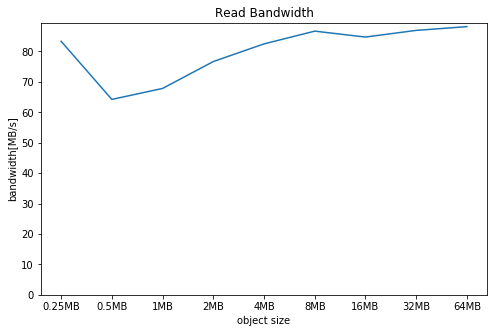

In [42]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

r_bw_list = []
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    r_bw_list.append([object_sizes[i],data['jobs'][0]['read']['bw']/1000])

r_bw_df = pd.DataFrame(r_bw_list, columns=['object size','bandwidth[MB/s]'])
display(r_bw_df)

fig = r_bw_df.plot(x='object size', y='bandwidth[MB/s]', title='Read Bandwidth' ,legend=False, xticks=r_bw_df.index , figsize=[8,5])
fig.set_ylabel("bandwidth[MB/s]")
fig.set_ylim(ymin=0)
plt.show()

<center> <h3> Sequential Write Latency vs. Object Sizes </h3> </center>

,object size,latency[msec]
0,0.25MB,6.488383
1,0.5MB,15.977969
2,1MB,28.163517
3,2MB,53.958427
4,4MB,106.194054
5,8MB,238.311316
6,16MB,437.843318
7,32MB,916.142318
8,64MB,1736.997226


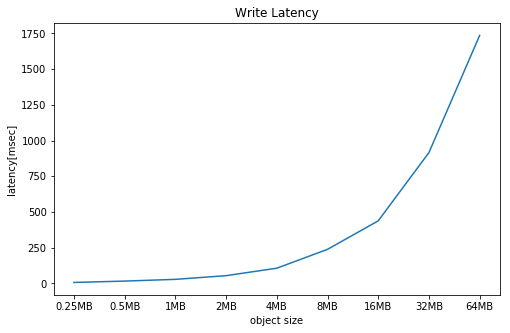

In [30]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

w_lat_list = []
for i in range(len(object_sizes)):
    with open('./data/W'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    w_lat_list.append([object_sizes[i],data['jobs'][0]['write']['lat_ns']['mean']/1000000])

w_lat_df = pd.DataFrame(w_lat_list, columns=['object size','latency[msec]'])
display(w_lat_df)

fig = w_lat_df.plot(x='object size', y='latency[msec]', title='Write Latency' ,legend=False, xticks=w_lat_df.index , figsize=[8,5])
fig.set_ylabel("latency[msec]")
plt.show()

<center> <h3> Sequential Read Latency vs. Object Sizes </h3> </center>

,object size,latency[msec]
0,0.25MB,3.067835
1,0.5MB,7.965481
2,1MB,15.088506
3,2MB,26.700362
4,4MB,49.644702
5,8MB,94.490801
6,16MB,193.321632
7,32MB,376.899818
8,64MB,743.282003


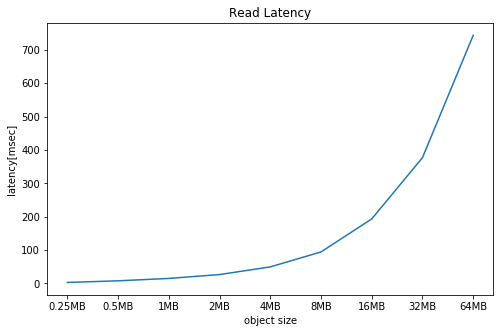

In [31]:
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']

r_lat_list = []
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)
    r_lat_list.append([object_sizes[i],data['jobs'][0]['read']['lat_ns']['mean']/1000000])

r_lat_df = pd.DataFrame(r_lat_list, columns=['object size','latency[msec]'])
display(r_lat_df)

fig = r_lat_df.plot(x='object size', y='latency[msec]', title='Read Latency' ,legend=False, xticks=r_lat_df.index , figsize=[8,5])
fig.set_ylabel("latency[msec]")
plt.show()

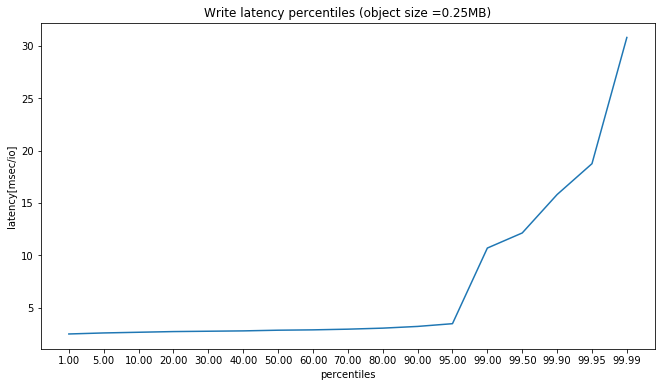

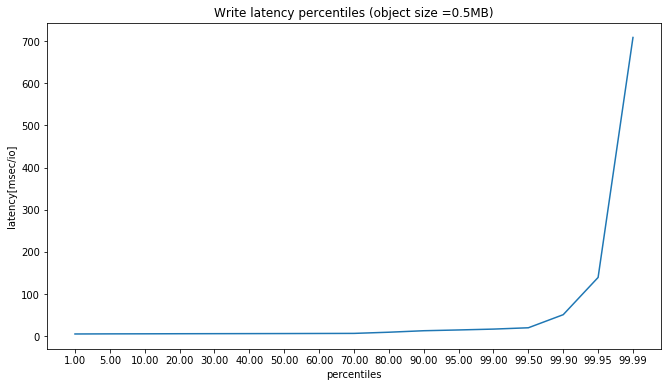

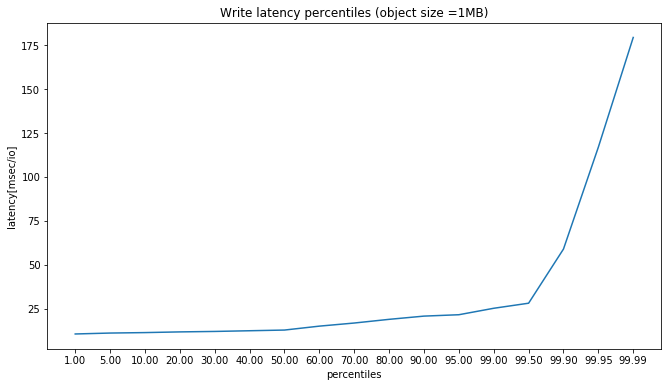

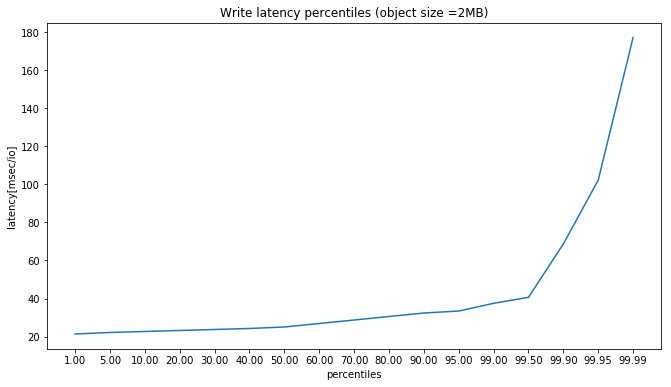

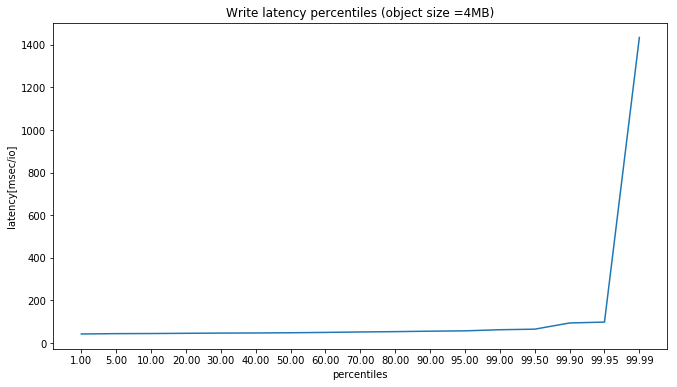

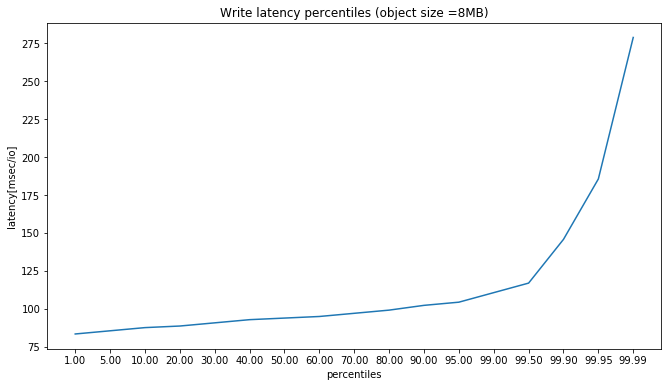

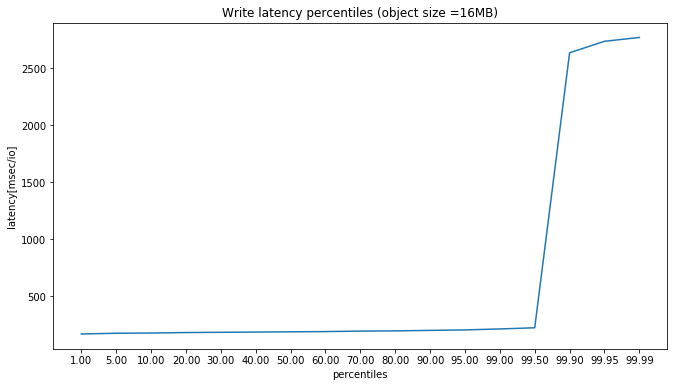

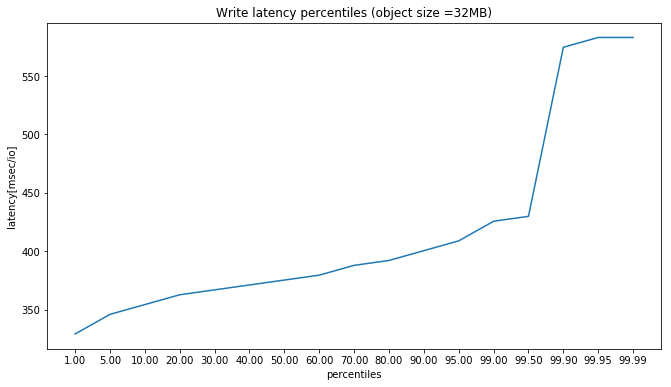

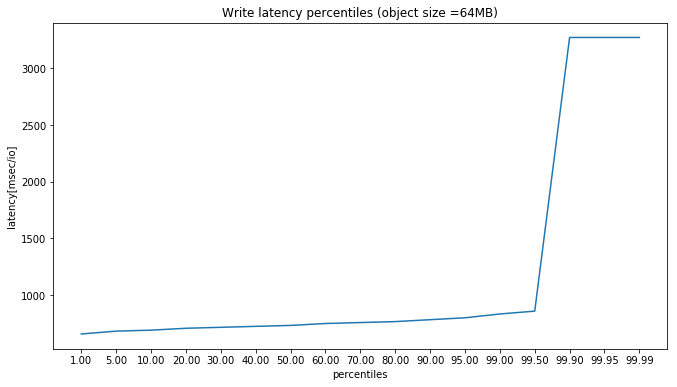

In [32]:
#read json result
object_sizes = ['0.25MB','0.5MB', '1MB', '2MB', '4MB', '8MB', '16MB', '32MB', '64MB']
for i in range(len(object_sizes)):
    with open('./data/R'+object_sizes[i]+'.json') as f:
        data = json.load(f)

    #transform data
    percentiles_df = pd.DataFrame(data['jobs'][0]['read']['clat_ns']['percentile'],index=['latency'])
    percentiles_df = percentiles_df.T
    percentiles_df = percentiles_df.reset_index()
    percentiles_df.rename(columns={'index': 'percentiles'}, inplace=True)

    #format data
    percentiles_df[['percentiles']] = percentiles_df[['percentiles']].astype(float).applymap('{:,.2f}'.format)
    percentiles_df[['latency']] = percentiles_df[['latency']].astype(int).applymap(lambda x: x/1000000)

    #display table
    #display(percentiles_df)

    #display graph
    obj_size = object_sizes[i]
    fig = percentiles_df.plot(x='percentiles', y='latency', title="Write latency percentiles (object size =" + obj_size + ')' ,legend=False, xticks=percentiles_df.index , figsize=[11,6])
    fig.set_ylabel("latency[msec/io]")
    plt.show()


,bandwidth,latency
0,38.826,105.489792
1,39.701,103.165862
2,39.049,104.886195
3,39.494,103.704746
4,35.853,114.237834
5,16.228,252.392042


,jobnum,bandwidth
0,1,38.826
1,2,39.701
2,3,39.049
3,4,39.494
4,5,35.853
5,6,16.228


,jobnum,latency
0,1,105.489792
1,2,103.165862
2,3,104.886195
3,4,103.704746
4,5,114.237834
5,6,252.392042


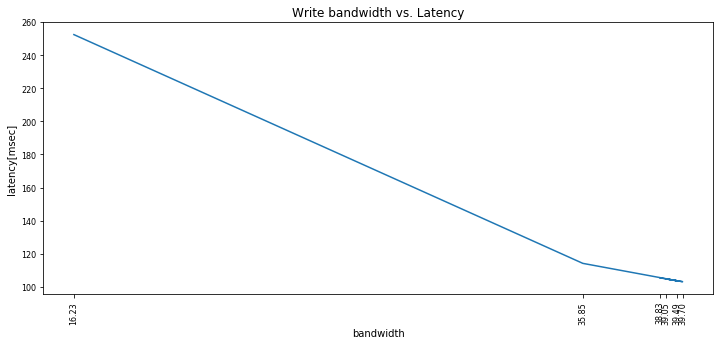

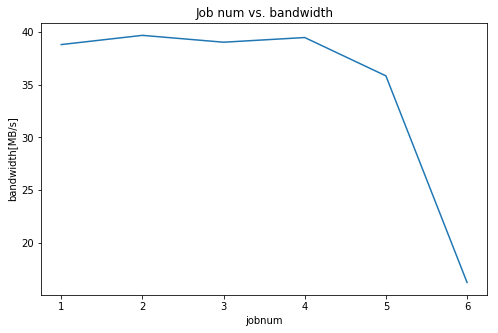

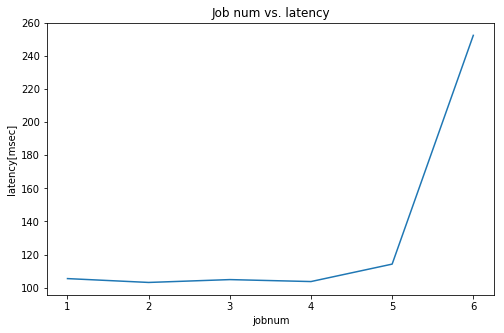

In [48]:
#numjobs = ['1','2','4','8','16','32','64']
numjobs = list(map(lambda x: str(x), range(1,7)))

jobnum_bw = []
jobnum_lat = []
bw_lat = []


for i in range(len(numjobs)):
    with open('./data/W4MB_'+numjobs[i]+'.json') as f:
        data = json.load(f)
    bw_lat.append([data['jobs'][0]['write']['bw']/1000,data['jobs'][0]['write']['lat_ns']['mean']/1000000])
    jobnum_bw.append([numjobs[i], data['jobs'][0]['write']['bw']/1000])
    jobnum_lat.append([numjobs[i], data['jobs'][0]['write']['lat_ns']['mean']/1000000])
    
bw_lat = pd.DataFrame(bw_lat, columns=['bandwidth','latency'])
jobnum_bw = pd.DataFrame(jobnum_bw, columns=['jobnum','bandwidth'])
jobnum_lat = pd.DataFrame(jobnum_lat, columns=['jobnum','latency'])
display(bw_lat)
display(jobnum_bw)
display(jobnum_lat)

fig = bw_lat.plot(kind='line', x='bandwidth', y='latency', title='Write bandwidth vs. Latency' ,legend=False, xticks=bw_lat.bandwidth, fontsize = 8 , rot = 90, figsize=[12,5])
fig.set_ylabel("latency[msec]")


fig_jw = jobnum_bw.plot(kind='line', x='jobnum', y='bandwidth', title='Job num vs. bandwidth' ,legend=False, xticks=jobnum_bw.index,  figsize=[8,5])
fig_jw.set_ylabel("bandwidth[MB/s]")

fig_lt = jobnum_lat.plot(kind='line', x='jobnum', y='latency', title='Job num vs. latency' ,legend=False, xticks=jobnum_lat.index,  figsize=[8,5])
fig_lt.set_ylabel("latency[msec]")

plt.show()